In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as st
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lOADING THE FILE

In [3]:
dataset=pd.read_csv('Salary.csv')

In [4]:
dataset

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
#EDA PROCESS

In [6]:
dataset.keys()

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [7]:
df=pd.DataFrame(dataset)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [8]:
df.shape

(397, 6)

In [9]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [10]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [11]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

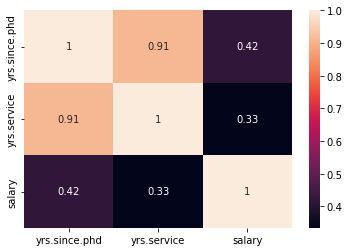

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

<AxesSubplot:ylabel='Frequency'>

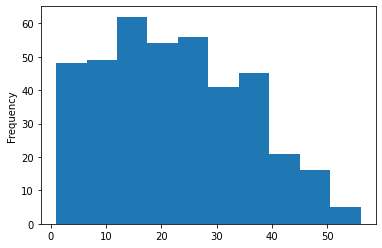

In [14]:
df['yrs.since.phd'].plot.hist()

yrs.since.phd       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
yrs.service      AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
salary           AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
dtype: object

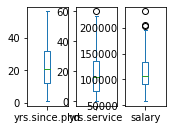

In [15]:
df.plot(kind='box',subplots=True,layout=(2,7))

In [16]:
x=dataset.drop('salary',axis=1)
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,Prof,B,19,18,Male
1,Prof,B,20,16,Male
2,AsstProf,B,4,3,Male
3,Prof,B,45,39,Male
4,Prof,B,40,41,Male
...,...,...,...,...,...
392,Prof,A,33,30,Male
393,Prof,A,31,19,Male
394,Prof,A,42,25,Male
395,Prof,A,25,15,Male


In [17]:
X=x.apply(pd.to_numeric,errors='coerce')
X

,rank,discipline,yrs.since.phd,yrs.service,sex
0,NaN,NaN,19,18,NaN
1,NaN,NaN,20,16,NaN
2,NaN,NaN,4,3,NaN
3,NaN,NaN,45,39,NaN
4,NaN,NaN,40,41,NaN
...,...,...,...,...,...
392,NaN,NaN,33,30,NaN
393,NaN,NaN,31,19,NaN
394,NaN,NaN,42,25,NaN
395,NaN,NaN,25,15,NaN


In [18]:
X.fillna(0,inplace=True)
X

,rank,discipline,yrs.since.phd,yrs.service,sex
0,0.0,0.0,19,18,0.0
1,0.0,0.0,20,16,0.0
2,0.0,0.0,4,3,0.0
3,0.0,0.0,45,39,0.0
4,0.0,0.0,40,41,0.0
...,...,...,...,...,...
392,0.0,0.0,33,30,0.0
393,0.0,0.0,31,19,0.0
394,0.0,0.0,42,25,0.0
395,0.0,0.0,25,15,0.0


In [19]:
y=dataset.iloc[:,-1]
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [20]:
Y=y.apply(pd.to_numeric,errors='coerce')
Y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [21]:
dataset.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=45)

In [23]:
X_train.shape

(317, 5)

In [24]:
X_test.shape

(80, 5)

In [25]:
Y_train.shape

(317,)

In [26]:
Y_test.shape

(80,)

In [27]:
lm=LinearRegression() 

In [28]:
lm.fit(X_train,Y_train)

LinearRegression()

In [29]:
lm.coef_

array([ 0.00000000e+00,  1.13686838e-13,  1.37517452e+03, -3.81581362e+02,
        0.00000000e+00])

In [30]:
lm.intercept_

90176.58028967943

In [33]:
lm.score(X_train,Y_train)

0.20031325457677374

In [32]:
#predict the value
pred=lm.predict(X_test)
print('Predicted salary :',pred)
print('Actual salary',Y_test)

Predicted salary : [122122.71226096 122504.29362251  99882.08143148 121200.9905228
 128688.87491479 111113.90801946 110271.46578883 122885.87498405
  93538.94112413 111193.18752699  91551.75480886 140849.83132899
 117997.18870342  99270.06963539 103626.02362747 129538.72523347
 134729.71336812 116002.59430009 112409.80303111 122806.59547652
 118529.92099197 100033.23235848 118832.22284599 124642.63086478
 129761.74757996 106988.38446192  98888.48827384 118681.07191898
 128696.28300285  93920.52248567 108061.25712708 134888.27238319
 108133.12854656 131900.08482223 103856.45406201 122885.87498405
 103626.02362747 116081.87380763  94150.95292021 141065.44558741
 121964.15324589 141152.133183   103777.17455448 114173.96699989
 104158.75591602 105764.36086974 132901.08606792 135881.86554082
 114944.53781104 129531.31714542  99810.210012   100875.67458911
  97052.45288558 130071.45752203 114785.97879598 111042.03659998
 131446.63204121 108975.57077718 101106.10502365 102250.84910829
  95144